# Bank Telemarketing prediction

## Modelling and Conclusion




## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score,roc_auc_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import pickle


In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

C:\Users\Willlin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Willlin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Willlin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Willlin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarnin

## 2. Reading clean Dataset

### 2.1.  Full bank dataset aka train data

In [4]:
bank_af= pd.read_csv('../dataset/bank_af_final.csv')

In [5]:
bank_af.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,...,pdays_15 -18 days,pdays_18 -21 days,pdays_21 -27 days,pdays_3 -6 days,pdays_3 days or less,pdays_6 -9 days,pdays_9 -12 days,pdays_new clients,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,57,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,37,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,40,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


### 2.2 Preparing train dataset for modeling

In [6]:
X = bank_af.drop('y', axis=1)
y = bank_af['y']

In [7]:
X.shape

(32835, 57)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.2, random_state=42)

In [9]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

## 3.  Modeling

### 3.1 Logistic Regression


In [10]:
pipe_lr = Pipeline([('sm', SMOTE()),
    
    ('lr', LogisticRegression(random_state=42, max_iter=10_000))
])

print('Validation Score: ', cross_val_score(pipe_lr, X_train_ss, y_train, cv=5, scoring='recall'))

pipe_lr_params = {'lr__C': np.linspace(0.1, 1, 20)}


gs_lr = GridSearchCV(pipe_lr, param_grid=pipe_lr_params, cv=5, scoring='recall')

gs_lr.fit(X_train_ss, y_train)

print('\n', gs_lr.best_params_, '\n')

best_model_lr = gs_lr.best_estimator_

print('Train Accuracy Score: ', round(best_model_lr.score(X_train_ss, y_train), 3))
print('Test Accuracy Score: ', round(best_model_lr.score(X_test_ss, y_test), 3))
print('\nTrain Recall Score: ', round(recall_score(y_train, best_model_lr.predict(X_train_ss)), 3))
print('Test Recall Score: ', round(recall_score(y_test, best_model_lr.predict(X_test_ss)), 3))



Validation Score:  [0.88613861 0.86633663 0.87128713 0.83415842 0.86881188]

 {'lr__C': 0.1473684210526316} 

Train Accuracy Score:  0.869
Test Accuracy Score:  0.86

Train Recall Score:  0.875
Test Recall Score:  0.883


The model's accuracy on both training and testing data are similar, however the recall score for its test data is slightly higher than its training data. Various hyperparameters were tried and the gap decreased but the slightly higher score still remained. The data processing process was analysed for data leakage but none was found.

### 3.2 Naive Bayes

In [11]:
pipe_gb = Pipeline([('sm', SMOTE()),
    
    ('gb', GaussianNB())])

print('Validation Score: ', cross_val_score(pipe_gb, X_train_ss, y_train, cv=5, scoring='recall'))

pipe_gb_params = {'gb__var_smoothing': np.logspace(0,-9, num=100)}

gs_gb = GridSearchCV(pipe_gb, param_grid=pipe_gb_params, cv=5, scoring='recall')

gs_gb.fit(X_train_ss, y_train)

print('\n', gs_gb.best_params_, '\n')

best_model_gb = gs_gb.best_estimator_

print('Train Accuracy Score: ', round(best_model_gb.score(X_train_ss, y_train), 3))
print('Test Accuracy Score: ', round(best_model_gb.score(X_test_ss, y_test), 3))
print('\nTrain Recall Score: ', round(recall_score(y_train, best_model_gb.predict(X_train_ss)), 3))
print('Test Recall Score: ', round(recall_score(y_test, best_model_gb.predict(X_test_ss)), 3))

Validation Score:  [0.52227723 0.65841584 0.48267327 0.6039604  0.50990099]

 {'gb__var_smoothing': 1e-09} 

Train Accuracy Score:  0.91
Test Accuracy Score:  0.903

Train Recall Score:  0.506
Test Recall Score:  0.487


Naive Bayes classifiers are classifiers which use probabilities for their classifications and are based on Bayes' Theorem. They assume that the features are independent from each other and are supposed to achieve high accuracy.

The model's accuracy on both training and testing data are similar, however the recall score for its test data is slightly higher than its training data. Various hyperparameters were tried and the gap decreased but the slightly higher score still remained. The data processing process was analysed for data leakage but none was found.

### 3.3 Random Forest

In [12]:
pipe_rf = Pipeline([('sm', SMOTE()),
    
    ('rf', RandomForestClassifier(n_estimators=100))
])

print('Validation Score: ', cross_val_score(pipe_rf, X_train_ss, y_train, cv=5, scoring='recall'))

rf_params = {
    'rf__n_estimators': [100, 150, 200],
    'rf__max_depth': [None, 1, 2, 3, 4, 5],
}


gs_rf = GridSearchCV(pipe_rf, param_grid=rf_params, cv=5, scoring='recall')

gs_rf.fit(X_train_ss, y_train)

print('\n', gs_rf.best_params_, '\n')

best_model_rf = gs_rf.best_estimator_

print('Train Accuracy Score: ', round(best_model_rf.score(X_train_ss, y_train), 3))
print('Test Accuracy Score: ', round(best_model_rf.score(X_test_ss, y_test), 3))
print('\nTrain Recall Score: ', round(recall_score(y_train, best_model_rf.predict(X_train_ss)), 3))
print('Test Recall Score: ', round(recall_score(y_test, best_model_rf.predict(X_test_ss)), 3))



Validation Score:  [0.47524752 0.47772277 0.4480198  0.46534653 0.45049505]

 {'rf__max_depth': 1, 'rf__n_estimators': 150} 

Train Accuracy Score:  0.76
Test Accuracy Score:  0.74

Train Recall Score:  0.812
Test Recall Score:  0.808


Naive Bayes classifiers are classifiers which use probabilities for their classifications and are based on Bayes' Theorem. They assume that the features are independent from each other and are supposed to achieve high accuracy.

The model's accuracy score and recall score is slightly higher for the training set than the test set. Various hyperparameters were tried and the gap decreased but the slightly higher score still remained. 

### 3.4 XGBoost

In [43]:
pipe_x = Pipeline([('sm', SMOTE()),
    
    ('x', XGBClassifier(random_state = 42))
])

print('Accuracy Score: ', cross_val_score(pipe_x, X_train_ss, y_train, cv=5, scoring='recall'))

pipe_params_x = {

'x__nthread':[1,2],
'x__objective':['binary:logistic'],
'x__learning_rate': [0.1, 0.01, 0.001],
'x__max_depth': [5],
'x__min_child_weight': [4],
'x__silent': [1],
'x__subsample': [0.7, 0.8],
'x__n_estimators': [200, 300, 400, 500, 600]}

gs_x = GridSearchCV(pipe_x, 
                  param_grid=pipe_params_x, 
                  cv=5,scoring='recall') 

gs_x.fit(X_train_ss, y_train)

print('\n', gs_x.best_params_, '\n')

best_model_x = gs_x.best_estimator_

print('Train Accuracy Score: ', round(best_model_x.score(X_train_ss, y_train), 3))
print('Test Accuracy Score: ', round(best_model_x.score(X_test_ss, y_test), 3))
print('\nTrain Recall Score: ', round(recall_score(y_train, best_model_x.predict(X_train_ss)), 3))
print('Test Recall Score: ', round(recall_score(y_test, best_model_x.predict(X_test_ss)), 3))

Accuracy Score:  [0.64851485 0.62128713 0.58663366 0.58168317 0.62376238]

 {'x__learning_rate': 0.001, 'x__max_depth': 5, 'x__min_child_weight': 4, 'x__n_estimators': 600, 'x__nthread': 2, 'x__objective': 'binary:logistic', 'x__silent': 1, 'x__subsample': 0.7} 

Train Accuracy Score:  0.872
Test Accuracy Score:  0.861

Train Recall Score:  0.847
Test Recall Score:  0.818


XGBoost (eXtreme Gradient Boosting) is an advanced version of gradient boosted decision trees designed to be efficient, flexible and portable.

The model's accuracy score and recall score is slightly higher for the training set than the test set. Various hyperparameters were tried and the gap decreased but the slightly higher score still remained. 

### 3.5  Production model selection

As Logistic regression has the highest recall score out all the models, it will reduce the false negatives and hence enable the bank to reduce the number of missed positive class. It is selected as the production model.

## 4. Model Evaluation

In [15]:
# Create a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in best_model_lr.predict_proba(X_test_ss)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [16]:
pred_y = best_model_lr.predict(X_test_ss)

### 4.1 Sensitivity and Specificity

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_y).ravel()

# The test specificity of the model

spec = tn / (tn + fp)

print(f'Logistic Regression Specificity: {round(spec,4)}')

# The test sensitivity of the model

sens = tp / (tp + fn)

print(f'Logisitic Regression Sensitivity: {round(sens,4)}')

Logistic Regression Specificity: 0.8583
Logisitic Regression Sensitivity: 0.8832


### 4.2 Confusion Matrix

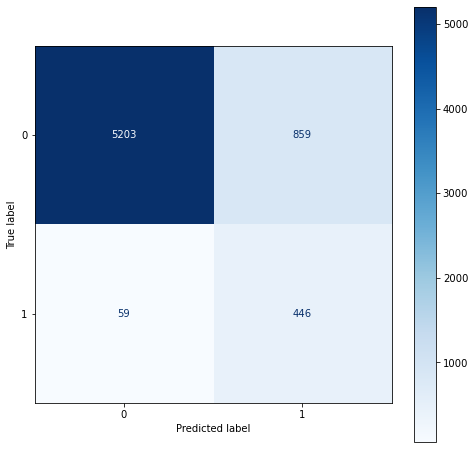

In [18]:
# plotting Confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(best_model_lr, X_test_ss, y_test, ax=ax, values_format = '.5g',cmap=plt.cm.Blues);

The model has a small number of false negatives which is good as we want to minimize the number of true cases that we miss.

### 4.3 Distribution of predicted probabilities

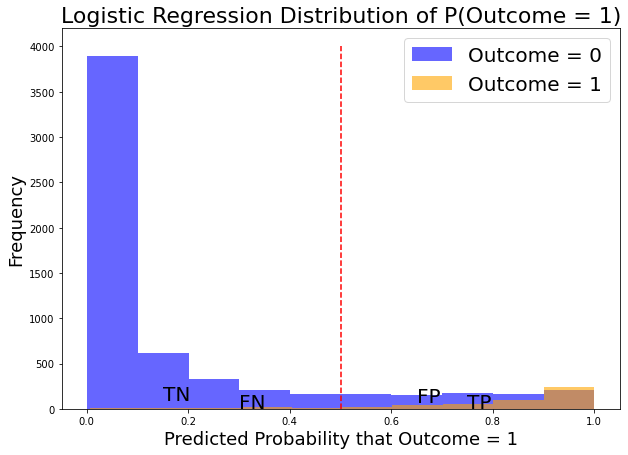

In [19]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'], color = 'b', alpha = 0.6, label = 'Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'], color = 'orange', alpha = 0.6, label = 'Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x = 0.5, ymin = 0, ymax = 4000, color = 'r', linestyle = '--')

# Add annotations for TN, FN, TP, FP.
plt.annotate(xy = (0.15, 100), s = 'TN', size = 20)
plt.annotate(xy = (0.3, 5), s = 'FN', size = 20)
plt.annotate(xy = (0.75, 5), s = 'TP', size = 20)
plt.annotate(xy = (0.65, 70), s = 'FP', size = 20)

# Label axes.
plt.title('Logistic Regression Distribution of P(Outcome = 1)', fontsize = 22)
plt.ylabel('Frequency', fontsize = 18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize = 18)

# Create legend.
plt.legend(fontsize = 20);

The distribution of the predicted probilities of the negative and positive classes shows that the predicted possibilities of the negative class (blue) is more than the positive class (orange). There is also quite a bit of overlap between both classes.

The threshold shown in the graph is 0.5 which seems an optimal balance to distinguish both the classes. The preference would be for the model to predict more of the positive class than negative class.

In addition, there is a tradeoff between sensitivity and specificity if the threshold is to be moved.

One measure of how much overlap exists between our distributions is the area under the ROC curve.

### 4.4 ROC Curve with AUC

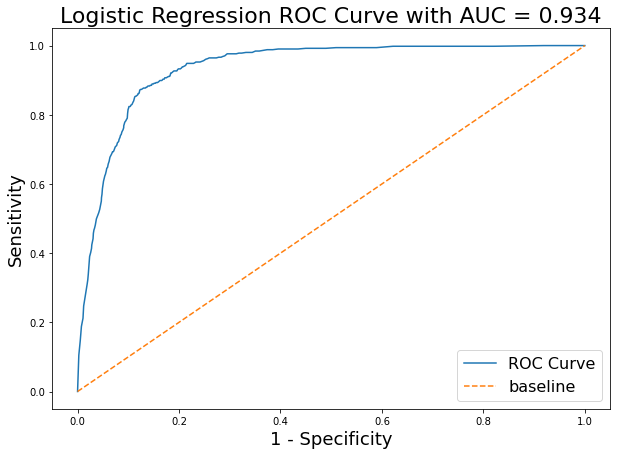

In [20]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, tpr_values, label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200), np.linspace(0, 1, 200), label='baseline', linestyle='--')

# Label axes.
plt.title(f'Logistic Regression ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

In [21]:
print("Baseline Score: 0.500")
print("ROC-AUC Score:", round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']), 3))

Baseline Score: 0.500
ROC-AUC Score: 0.934


The AUC - ROC curve or AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve is used to visualize the model's performance is classification. The higher the score , the better the model is predicting the negative and positive class.

The score of near to 1 or 1 indicates the model has almost perfect or perfect ability to classify between the 2 classes.

The score of 0.5, means model is unable to distinguish either class.

A score of zero means the model is classifying the positive class as the negative class and vice versa.

Our model has a score of 0.933 indicates that it can distinguish between the 2 classes with some accuracy, which should be very good as it is important to predict clients who would purchase the term deposit.

### 5 Analysis of impactful features

In [22]:
# mapping coefficients and their corresponding words into a mainframe
columns = X.columns
coefficients =pd.DataFrame(best_model_lr.steps[1][1].coef_.T, 
                     index = columns, 
                     columns=['coef'])



coefficient = coefficients.sort_values('coef', ascending=False)['coef']



In [23]:
labels = coefficient.sort_values().index

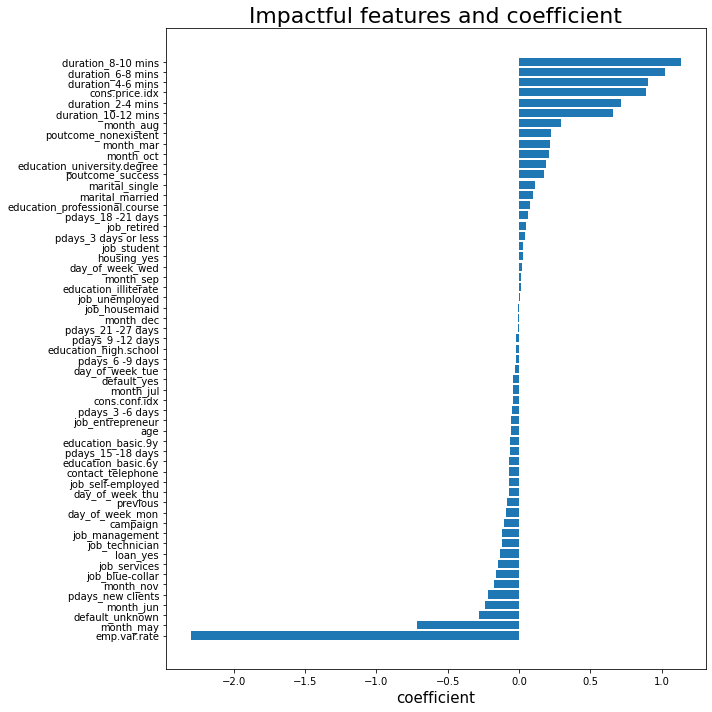

In [24]:
plt.figure(figsize=(10,10))
plt.barh(labels, coefficient.sort_values() )
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('coefficient', fontsize=15)
plt.title('Impactful features and coefficient', fontsize=22)
plt.tight_layout()

In [25]:
# Sorting into the top 20 coefficients and their words
coefficient_20 = (coefficients.sort_values('coef', ascending=False))['coef'][:20]


In [26]:
coefficient_20

duration_8-10 mins               1.135907
duration_6-8 mins                1.026296
duration_4-6 mins                0.906829
cons.price.idx                   0.892470
duration_2-4 mins                0.711558
duration_10-12 mins              0.662269
month_aug                        0.295315
poutcome_nonexistent             0.223843
month_mar                        0.219681
month_oct                        0.211931
education_university.degree      0.190919
poutcome_success                 0.175764
marital_single                   0.113418
marital_married                  0.098637
education_professional.course    0.078465
pdays_18 -21 days                0.066141
job_retired                      0.049882
pdays_3 days or less             0.045616
job_student                      0.025836
housing_yes                      0.024906
Name: coef, dtype: float64

The various duration features are the top impactful features which aligns to the research done by the data creator (Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014). 

This makes sense as the longer the call duration, the more time the telemarketer as to convince the customer to purchase the product. However although the duration is a good feature to analyse, as the duration can only be derived after the call has been made, it is not a useful feature to help predict before a call is made. Hence another analysis should be conducted after the duration feature is dropped.

Analysis of the other features will be done after duration is dropped.

## 6. Dropping Duration column

In [27]:
bank_af.columns


Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'duration_10-12 mins', 'duration_2-4 mins',
       'duration_4-6 mins', 'duration_6-8 mins', 'duration_8-10 mins',
       'pdays_15 -18 days', 'pdays_18 -21 days', 'pdays_21 -27 days'

In [28]:
# Dropping duration related columns

X_new = bank_af.drop(['y','duration_10-12 mins', 'duration_2-4 mins',
       'duration_4-6 mins', 'duration_6-8 mins', 'duration_8-10 mins',], axis=1)
y_new = bank_af['y']



In [29]:
X_new.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,pdays_15 -18 days,pdays_18 -21 days,pdays_21 -27 days,pdays_3 -6 days,pdays_3 days or less,pdays_6 -9 days,pdays_9 -12 days,pdays_new clients,poutcome_nonexistent,poutcome_success
0,56,1,0,1.1,93.994,-36.4,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,57,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,37,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,40,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,56,1,0,1.1,93.994,-36.4,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
# Export engineered dataset to CSV for deployment

X_new.to_csv('../dataset/deployment.csv', index=False)

### 6.1 Modeling on new dataset

In [31]:
# Train test split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, stratify=y_new,
                                                    test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_new_ss = ss.fit_transform(X_train_new)
X_test_new_ss = ss.transform(X_test_new)

Using Logistic Regression to model as it was the optimum classifier before

In [32]:
pipe_lr = Pipeline([('sm', SMOTE()),
    
    ('lr', LogisticRegression(random_state=42, max_iter=10_000))
])

print('Validation Score: ', cross_val_score(pipe_lr, X_train_new_ss, y_train_new, cv=5, scoring='recall'))

pipe_lr_params = {'lr__C': np.linspace(0.1, 1, 20)}


gs_lr = GridSearchCV(pipe_lr, param_grid=pipe_lr_params, cv=5, scoring='recall')

gs_lr.fit(X_train_new_ss, y_train_new)

print('\n', gs_lr.best_params_, '\n')

best_model_lr = gs_lr.best_estimator_

print('Train Accuracy Score: ', round(best_model_lr.score(X_train_new_ss, y_train_new), 3))
print('Test Accuracy Score: ', round(best_model_lr.score(X_test_new_ss, y_test_new), 3))
print('\nTrain Recall Score: ', round(recall_score(y_train_new, best_model_lr.predict(X_train_new_ss)), 3))
print('Test Recall Score: ', round(recall_score(y_test_new, best_model_lr.predict(X_test_new_ss)), 3))

Validation Score:  [0.80445545 0.79207921 0.78465347 0.7549505  0.77722772]

 {'lr__C': 0.1} 

Train Accuracy Score:  0.852
Test Accuracy Score:  0.838

Train Recall Score:  0.788
Test Recall Score:  0.772


Dropping the duration feature has caused the model's accuracy and recall score to drop, which is to be expected since it was one of the most impactful features.

In [33]:
# pickling model for deployment
filename= 'capstone.pkl'
pickle.dump(best_model_lr, open(filename,'wb'))

## 7 Analysis of impactful features after dropping the duration related features

In [34]:
# mapping coefficients into a mainframe
columns = X_train_new.columns
coefficients =pd.DataFrame(best_model_lr.steps[1][1].coef_.T, 
                     index = columns, 
                     columns=['coef'])


coefficient = coefficients.sort_values('coef', ascending=False)['coef']


In [35]:
labels = coefficient.sort_values().index

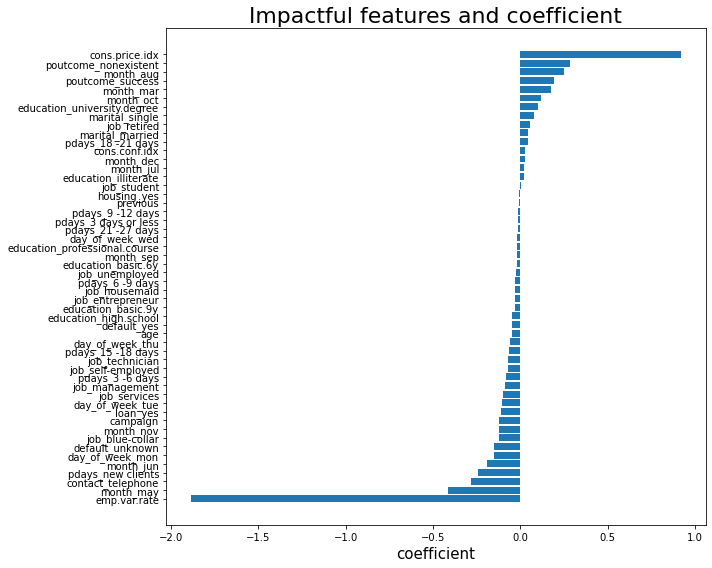

In [36]:
# plotting coeffients

plt.figure(figsize=(10,8))
plt.barh(labels, coefficient.sort_values() )
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('coefficient', fontsize=15)
plt.title('Impactful features and coefficient', fontsize=22)
plt.tight_layout()

In [37]:
# Sorting into the top 20 coefficients
coefficient_20 = (coefficients.sort_values('coef', ascending=False))['coef'][:20]

coefficient_20



cons.price.idx                 0.919063
poutcome_nonexistent           0.284462
month_aug                      0.247693
poutcome_success               0.191082
month_mar                      0.177133
month_oct                      0.118452
education_university.degree    0.101506
marital_single                 0.077721
job_retired                    0.053781
marital_married                0.043123
pdays_18 -21 days              0.042390
cons.conf.idx                  0.028831
month_dec                      0.024902
month_jul                      0.022757
education_illiterate           0.020432
job_student                    0.004837
housing_yes                   -0.006057
previous                      -0.009243
pdays_9 -12 days              -0.011565
pdays_3 days or less          -0.014822
Name: coef, dtype: float64

From the graph above, it may seem that the features do not make sense unless the features are grouped under these categories:

Economic indicators, time related features, disposable income features, Contacts before the current campaign/ psychological features:, Risk acceptance and yield features.

Economic indicators :

The negative impact of the employment variation rate means that the higher the variation rate the less likely clients would purchase the product, this could be that the more variation, the more the economy is in flux and hence clients may not want to purchase a product. The positive impact of the consumer price index makes sense as the higher the index, the better the economy is doing and hence clients woud have more disposable income to purchase the financial product.The lower impact of the consumer confidence index make indicate that the consumer confidence index is a lower indicate of economic levels than the consumer price index.

Time related features:

The next largest negative impact feature is the month of may, it is difficult to derive a trend from the features related to time e.g month, day of week, as seen in the EDA, the number of calls made at each time interval is not equal. During May, the telemarkers made the most calls which could be for reasons such as it was the start of the campaign. Similarly the telemarketers made more calls on Thurs than any other days. Interestingly, the day of week features are much lower than the month features in terms of impact. Hence time related features may not be good predictors.

Disposable income features:

The next largest negative impact feature is clients contacted via telephone, this could be due to either client's contacted via telephones may not have cellular phones and hence less disposable income or it could be that clients contacted via telephones are at home or in the office and are too busy to listen or purchase the financial product.

Other disposable income features such as education, job and marital status also are quite high in negative and positive impact e.g clients with degrees have a high positive impact and people with degrees are most likely to have higher paying jobs. This makes sense as people with higher disposable income would be more likely to be able to purchase a financial product.

The negative impact of both housing and personal loans further corrborates the above analysis.

Contacts before the current campaign features:

It is interesting that the features relating to contacts before the current campaign have the next largest impact e.g putcome - nonexistant, pdays 18-21 days and pdays- new clients. As the values of non-existant can mean that the clients were contacted previously but did not say yes or no. The 2 features seem to indicate a psychological influence i.e clients who were contacted previously would have an impact, in addition, the different pday intervals may indicate the influence of the sales technique called "keeping the clients warm" whereby sales personnel would keep in regular contact with the clients to ensure the clients develop a familiarity with themselves or the company. There seems to be a sweet spot of 18-21 days which may mean being contacted too soon may annoy the clients and contacted much later means the client has lost the feeling of familiarity.


Risk acceptance and yield:

Although it might like a contridiction that clients in management roles have a negative impact on whether they would purchase a product even though they would likely have higher disposable income. This could be due to the type of financial product being marketed. The term deposit is a low risk and hence low yield product. As people in management roles may be more financially saavy, they would likely purchase higher risk product with higher yields.



## 8. Conclusion

From the analysis above, it shows that economic factors have the strongest negative and positive impact on whether a client would purchase a product. This makes sense that higher economic levels would mean clients would more likely purchase a product. 

Although time related features have the next largest impact, as these are dependent on the number of calls made during that period and the data shows the call numbers were inconsistent for every month, hence any trend derived may not be accurate.

It makes sense that clients with higher disposable income would be more likely to purchase a product. Although it may also depend on whether the client is financial savvy as they may wish to purchase other higher yielding financial products.

Psychological factors seem to have weakest impact on whether clients make a purchase.

However, the model may not be able to generalise at other economic levels and other countries e.g Singapore. The current model is based on information from 2008 - 2010 in Portugal and that period was during a financial crisis and slow economic recovery. In addition it can be seen that calls were not made during the weekend which could be due to labor laws not allowing any work during the weekends and hence the model may not be accurate for countries that do work during the weekends and also when the economic levels are better.

## 9. Recommendation

The features with strong impact on whether clients would purchase a product seem to be external factors such as economic level, and hence out of the bank's control. 

However, further research can be done to determine whether different client profiles would be willing to purchase different types of financial products during different economic levels. The bank is then able to tweak their financial products accordingly and target appropriate clients. Thus ensuring that the bank is able to get revenue throughout different economic levels. The additional information required would be regarding the client's disposable income, their risk acceptance level, the other financial products bought, the yield of the other financial products bought, the risk level of the financial products bought, the interest rate vs the financial yield.

In addition, data on the telemarketer's ability to sell the product would be useful to determine whether selling ability is a strong influence and also whether different telemarketers are able to sell to different client profiles more effectively would determine whether selling ability is another influence on financial product purchase and to help the telemarketers sell more effectively.

Furthermore, more years of data and data from other countries need to be analysed to make the model more accurate and generalizable.


## 10 Further considerations

The model can be used to generate leads based on the probability they would purchase a term deposit, which would be helpful for the telemarketers to target high probability clients. This would save the telemarketers time so that they can sell more effectively and hence make the bank's sales more effectively.

An example of the generator is found below.

### 10.1 Lead Generator

In [38]:
## Generating random phone numbers

from random import randint
def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end)

X_train_new["phone number"] = 1

X_train_new['phone number'] = X_train_new['phone number'].apply(lambda x:f'{9}{random_with_N_digits(7)}')


X_train_new['phone number'].head()



C:\Users\Willlin\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Willlin\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


6772     92970785
20468    92215054
15272    96582899
9383     96368440
19163    96293064
Name: phone number, dtype: object

In [39]:
## Generating Unique User ID

X_train_new['User ID']=np.arange(len(X_train_new)).astype(str)





C:\Users\Willlin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
## Generating Leads by using sorted from high predicted probability of success to low probability


X_train_new['buy_prob'] = [prob[1] for prob in best_model_lr.predict_proba(X_train_new_ss)]

submission = X_train_new[['User ID','phone number' ,'buy_prob']]



C:\Users\Willlin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [41]:

# Getting leads with high probabilities using only success probilities of more than 50%

leads=submission.loc[X_train_new.buy_prob >0.5].sort_values(['buy_prob'], ascending= False)

leads.head()



,User ID,phone number,buy_prob
31490,6855,91232352,0.999974
32677,19616,98253436,0.996867
32748,6021,96358974,0.996466
31527,13537,97338971,0.996056
32720,1925,96112065,0.995852
